<a href="https://colab.research.google.com/github/YanjunLin-Andrie/FanaticFi/blob/main/FanaticFi_machine_learning_top15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn import svm
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
# Upload cc_default.csv to Colab
from google.colab import files

csv_file = files.upload()

# Load data
df = pd.read_csv(Path('2017-2021_Historical_Players_Data.csv'))
df.head()

Saving 2017-2021_Historical_Players_Data.csv to 2017-2021_Historical_Players_Data (2).csv


,DraftYr,Rk,Pk,Tm,Pos,Player,College,Contract Worth,Yrs,G,...,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1990,1,1,BRK,NaN,Derrick Coleman,Syracuse,nan,15.00,781.00,...,64.30,0.12,1.40,22.30,33.20,16.50,9.30,2.50,https://www.sports-reference.com/cbb/players/d...,1990
1,1990,2,2,OKC,NaN,Gary Payton,Oregon State,nan,17.00,1335.00,...,145.50,0.15,3.30,62.50,35.30,16.30,3.90,6.70,https://www.sports-reference.com/cbb/players/g...,1990
2,1990,3,3,DEN,NaN,Mahmoud Abdul-Rauf,LSU,nan,9.00,586.00,...,25.20,0.08,-0.80,4.50,26.70,14.60,1.90,3.50,https://www.sports-reference.com/cbb/players/m...,1990
3,1990,4,4,ORL,NaN,Dennis Scott,Georgia Tech,nan,10.00,629.00,...,33.40,0.09,0.20,9.90,28.60,12.90,2.80,2.10,https://www.sports-reference.com/cbb/players/d...,1990
4,1990,5,5,CHA,NaN,Kendall Gill,Illinois,nan,15.00,966.00,...,47.80,0.08,0.10,15.80,30.50,13.40,4.10,3.00,https://www.sports-reference.com/cbb/players/k...,1990


In [7]:
# Drop irrelevant columns

df = df.drop(columns = ['DraftYr','Pk','Tm','Player','College','Contract Worth','Yrs','playerurl','DraftYear','Pos']).fillna(0)
df

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG
0,1,781.00,25903.00,12884.00,7232.00,1985.00,0.45,0.29,0.77,64.30,0.12,1.40,22.30,33.20,16.50,9.30,2.50
1,2,1335.00,47117.00,21813.00,5269.00,8966.00,0.47,0.32,0.73,145.50,0.15,3.30,62.50,35.30,16.30,3.90,6.70
2,3,586.00,15628.00,8553.00,1087.00,2079.00,0.44,0.35,0.91,25.20,0.08,-0.80,4.50,26.70,14.60,1.90,3.50
3,4,629.00,17983.00,8094.00,1774.00,1296.00,0.42,0.40,0.79,33.40,0.09,0.20,9.90,28.60,12.90,2.80,2.10
4,5,966.00,29481.00,12914.00,4002.00,2945.00,0.43,0.30,0.75,47.80,0.08,0.10,15.80,30.50,13.40,4.10,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,56,2.00,7.00,1.00,0.00,1.00,0.00,0.00,0.50,0.00,0.16,6.10,0.00,3.50,0.50,0.00,0.50
1864,57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1865,58,18.00,117.00,19.00,27.00,1.00,0.73,0.00,0.75,0.40,0.14,-0.60,0.00,6.50,1.10,1.50,0.10
1866,59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02dc804d10>,
      dtype=object)

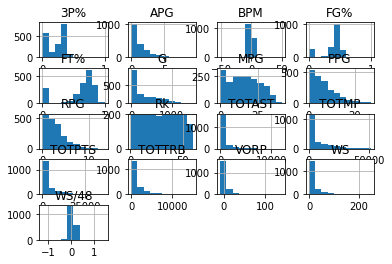

In [8]:
# Check data distribution of all aspects
df.hist()

In [9]:
# Create a column to hold Group data
df.loc[:,'Group'] = 0
df.head()

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Group
0,1,781.00,25903.00,12884.00,7232.00,1985.00,0.45,0.29,0.77,64.30,0.12,1.40,22.30,33.20,16.50,9.30,2.50,0
1,2,1335.00,47117.00,21813.00,5269.00,8966.00,0.47,0.32,0.73,145.50,0.15,3.30,62.50,35.30,16.30,3.90,6.70,0
2,3,586.00,15628.00,8553.00,1087.00,2079.00,0.44,0.35,0.91,25.20,0.08,-0.80,4.50,26.70,14.60,1.90,3.50,0
3,4,629.00,17983.00,8094.00,1774.00,1296.00,0.42,0.40,0.79,33.40,0.09,0.20,9.90,28.60,12.90,2.80,2.10,0
4,5,966.00,29481.00,12914.00,4002.00,2945.00,0.43,0.30,0.75,47.80,0.08,0.10,15.80,30.50,13.40,4.10,3.00,0


---
## Find top 15
### Binary Classification

In [10]:
# Create groups based on ranks
for index, row in df.iterrows():
    if row['Rk'] <= 15:
        df.at[index,'Group'] = 1
    else:
        df.at[index,'Group'] = 0
    
df

,Rk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Group
0,1,781.00,25903.00,12884.00,7232.00,1985.00,0.45,0.29,0.77,64.30,0.12,1.40,22.30,33.20,16.50,9.30,2.50,1
1,2,1335.00,47117.00,21813.00,5269.00,8966.00,0.47,0.32,0.73,145.50,0.15,3.30,62.50,35.30,16.30,3.90,6.70,1
2,3,586.00,15628.00,8553.00,1087.00,2079.00,0.44,0.35,0.91,25.20,0.08,-0.80,4.50,26.70,14.60,1.90,3.50,1
3,4,629.00,17983.00,8094.00,1774.00,1296.00,0.42,0.40,0.79,33.40,0.09,0.20,9.90,28.60,12.90,2.80,2.10,1
4,5,966.00,29481.00,12914.00,4002.00,2945.00,0.43,0.30,0.75,47.80,0.08,0.10,15.80,30.50,13.40,4.10,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,56,2.00,7.00,1.00,0.00,1.00,0.00,0.00,0.50,0.00,0.16,6.10,0.00,3.50,0.50,0.00,0.50,0
1864,57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1865,58,18.00,117.00,19.00,27.00,1.00,0.73,0.00,0.75,0.40,0.14,-0.60,0.00,6.50,1.10,1.50,0.10,0
1866,59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [11]:
# Set Feature and Target
X = df.drop(columns=['Rk','Group'])
y = df['Group']

In [12]:
y.value_counts()

0    1388
1     480
Name: Group, dtype: int64

In [13]:
# Split dataset into train, test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [14]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)

In [15]:
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---
## Use the SVC classifier model

In [16]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [17]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       357
           1       0.64      0.41      0.50       110

    accuracy                           0.81       467
   macro avg       0.74      0.67      0.69       467
weighted avg       0.79      0.81      0.79       467



### Over sampling

In [18]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [19]:
# Resample features and target
random_oversampler = RandomOverSampler(random_state = 1)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)


In [20]:
# Check resampled size
y_resampled.value_counts()

1    1031
0    1031
Name: Group, dtype: int64

In [21]:
# From SVM, instantiate SVC classifier model instance
svm_resampled_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_resampled_model = svm_resampled_model.fit(X_resampled, y_resampled)
 
# Use the testing data to make the model predictions
svm_resampled_pred = svm_resampled_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_resampled_testing_report = classification_report(y_test, svm_resampled_pred)

# Print the classification report
print(svm_resampled_testing_report)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       357
           1       0.00      0.00      0.00       110

    accuracy                           0.76       467
   macro avg       0.38      0.50      0.43       467
weighted avg       0.58      0.76      0.66       467



---
## Use Ddceision Tree

In [22]:
# Import decision tree classifier from SKLearn
from sklearn import tree

# Initiate the model instance
dtc = tree.DecisionTreeClassifier()

# Fit the model using the training data
dtc_model = dtc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
dtc_pred = dtc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
dtc_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(dtc_testing_report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       357
           1       0.44      0.40      0.42       110

    accuracy                           0.74       467
   macro avg       0.63      0.62      0.62       467
weighted avg       0.73      0.74      0.73       467



---
## Use Logistic Regression

In [23]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression()

# Fit the model using the training data
lr_model = lr.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_pred = lr_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       357
           1       0.44      0.40      0.42       110

    accuracy                           0.74       467
   macro avg       0.63      0.62      0.62       467
weighted avg       0.73      0.74      0.73       467



---
## Use AdaBoost

In [24]:
# Import AdaBoost classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier

# Initiate the model instance
abc = AdaBoostClassifier()

# Fit the model using the training data
abc_model = abc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
abc_pred = abc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
abc_testing_report = classification_report(y_test, abc_pred)

# Print the classification report
print(abc_testing_report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       357
           1       0.60      0.45      0.51       110

    accuracy                           0.80       467
   macro avg       0.72      0.68      0.69       467
weighted avg       0.78      0.80      0.79       467



---
## Use Deep Neural Network

### Use train test split method

In [25]:
# Define number of nodes on each layer
input_features = 16
layer1 = 40
layer2 = 30
layer3 = 10

# Initiate the model
nn = Sequential()

In [39]:
# Add all layers to the model
nn.add(Dense(
    units = layer1, 
    input_dim = input_features, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer2, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer3, 
    activation = 'relu'
))

# Add output layer
nn.add(Dense(units=1, activation = 'sigmoid'))

In [40]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [41]:
# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
44/44 [==============================] - 2s 5ms/step - loss: 0.2286 - accuracy: 0.7295
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.8308
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 0.8515
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.8622
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.8944
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.8979
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0710 - accuracy: 0.9051
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9072
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9193
Epoch 10/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9186
Epoch 11/

In [42]:
# Print loss and accuracy score of training set
loss, accuracy = nn.evaluate(X_train_scaled, y_train, verbose=2)

44/44 - 0s - loss: 0.0205 - accuracy: 0.9750 - 183ms/epoch - 4ms/step


In [43]:
# Print loss and accuracy score of testing set
val_loss, val_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

15/15 - 0s - loss: 0.2053 - accuracy: 0.7752 - 32ms/epoch - 2ms/step


In [44]:
X_test_scaled

array([[-0.34184622, -0.3250309 , -0.29412499, ...,  0.52259442,
        -0.25369002, -0.0878169 ],
       [-0.40389138, -0.55669932, -0.52832678, ..., -0.50891217,
        -0.79256196,  0.38964415],
       [-0.85371876, -0.7309762 , -0.64206956, ..., -0.47070823,
        -0.61293798, -0.63348668],
       ...,
       [ 0.94559076,  0.67753415,  0.71309436, ...,  0.80912403,
         0.28518191,  0.45785287],
       [-0.73893522, -0.60736365, -0.57230732, ...,  0.12145297,
        -0.02916005,  0.59427032],
       [ 1.33647525,  0.81922609,  0.56967014, ...,  0.29337074,
         0.3749939 ,  0.5260616 ]])

In [45]:
y_test

571     1
572     1
1802    0
1398    1
1451    1
       ..
1177    0
1385    0
1219    1
705     0
1103    0
Name: Group, Length: 467, dtype: int64

In [46]:
deep_net_pred = nn.predict(X_test_scaled)
deep_net_pred[:10]

array([[0.51367813],
       [0.02129993],
       [0.01561019],
       [0.0062792 ],
       [0.9993764 ],
       [0.01673198],
       [0.03822434],
       [0.05565932],
       [0.02129588],
       [0.01944655]], dtype=float32)

In [51]:
deep_net_pred = np.where(deep_net_pred > .5, 1, 0)


In [52]:
# deep_net_pred = nn.predict(X_test_scaled)
from itertools import chain
pred = list(chain(*deep_net_pred))
import numpy as np
array = np.asarray(pred)
array[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
deep_net_classification_report = classification_report(y_test, array)

# Print the classification report
print(deep_net_classification_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       357
           1       0.52      0.52      0.52       110

    accuracy                           0.78       467
   macro avg       0.69      0.69      0.69       467
weighted avg       0.77      0.78      0.77       467



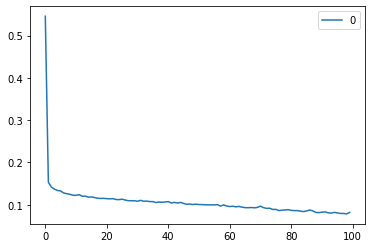

In [30]:
# Plot the loss rate
loss_df = pd.DataFrame(deep_net_model.history['loss'])
loss_df.plot()

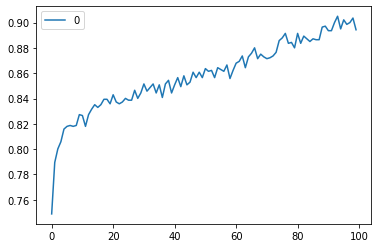

In [31]:
# Plot the accuracy score
accuracy_df = pd.DataFrame(deep_net_model.history['accuracy'])
accuracy_df.plot()

---
## Using validation split method


In [ ]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)
X_scaled = X_scaler.transform(X)

In [ ]:
# Initiate the model
nn = Sequential()
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
# Fit the model
history = nn.fit(X, y, validation_split=0.33, epochs=150, batch_size=30, verbose=0)
# list all data in history
print(history.history.keys())
[loss, accuracy] = nn.evaluate(X, y)
print("Train Data : Loss = {}, accuracy = {}".format(loss, accuracy))
[val_loss, val_accuracy] = nn.evaluate(X, y)
print("Test Data : Loss = {}, accuracy = {}".format(val_loss, val_accuracy))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---
## Using LazyPredict


In [ ]:
# Install LazyPRedict
!pip install lazypredict

# After installation, restart Runtime and proceed to the next cell

In [1]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Upload cc_default.csv to Colab
from google.colab import files
csv_file = files.upload()
# Load data
df = pd.read_csv(Path('2017-2021_Historical_Players_Data.csv'))
# Drop irrelevant columns
df = df.drop(columns = ['DraftYr','Pk','Tm','Player','College','Contract Worth','Yrs','playerurl','DraftYear','Pos']).fillna(0)
# Create a column to hold Group data
df.loc[:,'Group'] = 0
# Create groups based on ranks
for index, row in df.iterrows():
    if row['Rk'] <= 15:
        df.at[index,'Group'] = 1
    else:
        df.at[index,'Group'] = 0


# Set Feature and Target
X = df.drop(columns=['Rk','Group'])
y = df['Group']
# Re-split the train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
# Initiate the scaler
X_scaler = StandardScaler()
# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the new datasets
lc = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
lc_predictions = lc.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Print the model
print(lc_predictions)

Saving 2017-2021_Historical_Players_Data.csv to 2017-2021_Historical_Players_Data (1).csv


100%|██████████| 29/29 [00:10<00:00,  2.74it/s]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.78               0.75     0.75      0.79   
LinearDiscriminantAnalysis         0.82               0.74     0.74      0.82   
QuadraticDiscriminantAnalysis      0.79               0.74     0.74      0.79   
LogisticRegression                 0.82               0.73     0.73      0.81   
LinearSVC                          0.82               0.73     0.73      0.81   
RidgeClassifierCV                  0.82               0.73     0.73      0.81   
GaussianNB                         0.78               0.73     0.73      0.79   
RidgeClassifier                    0.82               0.73     0.73      0.81   
LGBMClassifier                     0.81               0.72     0.72      0.80   
NearestCentroid                    0.76               0.72     0.72      0.77   
CalibratedClassifierCV     